In [243]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random

In [244]:
data_path = 'languageID'
alpha = 1/2 
K_l = 3
num_sample = {'e': 10, 's': 10, 'j' : 10}
prior = {}
for label in num_sample:
    cnt = num_sample[label]
    prior[label] = (cnt + alpha)/ (sum(num_sample.values()) + (K_l*alpha))
prior

{'e': 0.3333333333333333, 's': 0.3333333333333333, 'j': 0.3333333333333333}

In [245]:
lang = []
dict_list = []
for label in ['e','s','j']:
    alpha_cnt = {}
    for i in range (0, 10):
        name = label + (str(i)) + ".txt"
        file_path = os.path.join('languageID', name)
        with open(file_path,'r') as f:
            content = f.read()
            for char in content:
                if char.isalpha() or char.isspace():
                    if char in alpha_cnt:
                        alpha_cnt[char] += 1
                    else:
                        alpha_cnt[char] = 1
    #sort keys
    if '\n' in alpha_cnt:
        del alpha_cnt['\n']

    sorted_dict = {key: alpha_cnt[key] for key in sorted(alpha_cnt.keys())}
    #finding theta
    deno = sum(sorted_dict.values()) + alpha*len(sorted_dict)
    theta = []
    for val in sorted_dict:
        i = (sorted_dict[val] + alpha)/ deno
        theta.append(i)
    dict_list.append(sorted_dict)
    lang.append(theta)


In [246]:
dict_list[2]

{' ': 1766,
 'a': 1885,
 'b': 155,
 'c': 78,
 'd': 246,
 'e': 861,
 'f': 55,
 'g': 200,
 'h': 454,
 'i': 1388,
 'j': 33,
 'k': 821,
 'l': 20,
 'm': 569,
 'n': 811,
 'o': 1304,
 'p': 12,
 'q': 1,
 'r': 612,
 's': 603,
 't': 815,
 'u': 1010,
 'v': 3,
 'w': 282,
 'y': 202,
 'z': 110}

In [247]:
lang[0]

[0.1792499586981662,
 0.0601685114819098,
 0.011134974392863043,
 0.021509995043779945,
 0.021972575582355856,
 0.1053692383941847,
 0.018932760614571286,
 0.017478936064761277,
 0.047216256401784236,
 0.055410540227986124,
 0.001420783082768875,
 0.0037336857756484387,
 0.028977366595076822,
 0.020518751032545846,
 0.057921691723112505,
 0.06446390219725756,
 0.01675202378985627,
 0.0005617049396993227,
 0.053824549810011564,
 0.06618205848339666,
 0.08012555757475633,
 0.026664463902197257,
 0.009284652238559392,
 0.015496448042293078,
 0.001156451346439782,
 0.013844374690236246,
 0.0006277878737815959]

In [248]:
#s
lang[1]

[0.16826493170115014,
 0.10456045141993771,
 0.008232863618143134,
 0.03752582405722919,
 0.039745922111559924,
 0.1138108599796491,
 0.00860287996053159,
 0.0071844839813758445,
 0.0045327001942585795,
 0.049859702136844375,
 0.006629459467793161,
 0.0002775122567913416,
 0.052943171656748174,
 0.02580863988159477,
 0.054176559464709693,
 0.07249236841293824,
 0.02426690512164287,
 0.007677839104560451,
 0.05929511886774999,
 0.06577040485954797,
 0.03561407295488884,
 0.03370232185254849,
 0.00588942678301625,
 9.250408559711388e-05,
 0.0024976103111220747,
 0.007862847275754679,
 0.0026826184823163022]

In [249]:
#j
lang[2]

[0.12345377035432245,
 0.13177021455028304,
 0.010867286323293032,
 0.005486057725906772,
 0.01722692012020407,
 0.06020686281361381,
 0.003878677755258928,
 0.014012160178908379,
 0.031763225941715004,
 0.09703682996715354,
 0.002341183870291425,
 0.05741141938640017,
 0.0014326647564469914,
 0.039800125794954226,
 0.05671255852959676,
 0.09116639877000489,
 0.0008735760710042631,
 0.00010482912852051157,
 0.04280522747920889,
 0.042176252708085823,
 0.05699210287231812,
 0.07061988957998462,
 0.00024460129988119366,
 0.019742819204696345,
 0.014151932350269061,
 0.007722412467677685]

In [250]:
#2.4
alpha_cnt = {}
name = 'e10.txt'
file_path = os.path.join('languageID', name)
with open(file_path,'r') as f:
    content = f.read()
    for char in content:
        if char.isalpha() or char.isspace():
            if char in alpha_cnt:
                alpha_cnt[char] += 1
            else:
                alpha_cnt[char] = 1
#sort keys
if '\n' in alpha_cnt:
    del alpha_cnt['\n']

x_test = {key: alpha_cnt[key] for key in sorted(alpha_cnt.keys())}
#finding theta
deno = sum(x_test.values()) + alpha*len(x_test)
theta_test = []
for val in x_test:
    i = (x_test[val] + alpha)/ deno
    theta_test.append(i)


In [251]:
list(x_test.values())

[498,
 164,
 32,
 53,
 57,
 311,
 55,
 51,
 140,
 140,
 3,
 6,
 85,
 64,
 139,
 182,
 53,
 3,
 141,
 186,
 225,
 65,
 31,
 47,
 4,
 38,
 2]

In [252]:
#log likelihood
p_list = []
language = 0
for label in ['e', 's', 'j']:
    i = 0
    p = 0
    for x in x_test:
        if x == list(dict_list[language].keys())[i]:
            p = p + x_test[x]*np.log(lang[language][i])
            i = i + 1
    p_list.append(p) 
    language = language + 1
p_list


[-7841.865447060634, -8467.282044010557, -8730.288949147405]

In [253]:
label_list = ['e', 's', 'j'] 
#log likelihood
p_list = []
language = 0
for label in ['e', 's', 'j']:
    i = 0
    p = 0
    for x in x_test:
        if x == list(dict_list[language].keys())[i]:
            p = p + x_test[x]*np.log(lang[language][i])
            i = i + 1
    p_list.append(p) 
    language = language + 1
p_list

#log posterior
p_list_post = p_list + np.log(list(prior.values()))
 
#show the class label (Choose the class with the highest posterior probability as the predicted class label for x)
ind_max = np.argmax(p_list_post)
label_list[ind_max]

'e'

In [254]:
p_list_post

array([-7842.96405935, -8468.3806563 , -8731.38756144])

In [211]:
#test files 10.txt to 19.txt in three languages
ee, ss, jj, ej, es, js, je, se, sj = 0,0,0,0,0,0,0,0,0
for label in ['e', 's', 'j']:
    for i in range(10, 20):
        alpha_cnt = {}
        name = label + str(i) + '.txt'
        file_path = os.path.join('languageID', name)
        with open(file_path,'r') as f:
            content = f.read()
            for char in content:
                if char.isalpha() or char.isspace():
                    if char in alpha_cnt:
                        alpha_cnt[char] += 1
                    else:
                        alpha_cnt[char] = 1
        #sort keys
        if '\n' in alpha_cnt:
            del alpha_cnt['\n']

        x_test = {key: alpha_cnt[key] for key in sorted(alpha_cnt.keys())}
        #finding theta
        deno = sum(x_test.values()) + alpha*len(x_test)
        theta_test = []
        for val in x_test:
            i = (x_test[val] + alpha)/ deno
            theta_test.append(i)
        
        #log likelihood
        p_list = []
        language = 0
        for label2 in ['e', 's', 'j']:
            i = 0
            p = 0
            for x in x_test:
                if x == list(dict_list[language].keys())[i]:
                    p = p + x_test[x]*np.log(lang[language][i])
                    i = i + 1
            p_list.append(p) 
            language = language + 1
        
        #log posterior
        p_list_post = p_list + np.log(list(prior.values()))

        #show the class label (Choose the class with the highest posterior probability as the predicted class label for x)
        ind_max = np.argmax(p_list_post)
        clas = label_list[ind_max]
        #evaluate
        if label == 'e' and clas == 'e':
            ee += 1
        if label == 'e' and clas == 'j':
            ej += 1
        if label == 'e' and clas == 's':
            es += 1
        if label == 'j' and clas == 'j':
            jj += 1
        if label == 'j' and clas == 's':
            js += 1
        if label == 'j' and clas == 'e':
            je += 1
        if label == 's' and clas == 's':
            ss += 1
        if label == 's' and clas == 'j':
            sj += 1
        if label == 's' and clas == 'e':
            se += 1
print(ee, ss, jj, ej, es, js, je, se, sj)

10 10 10 0 0 0 0 0 0


In [212]:
#2.8
alpha_cnt = {}
name = 'e10.txt'
file_path = os.path.join('languageID', name)
with open(file_path,'r') as f:
    content = f.read()
    shuffled_content = ''.join(random.sample(content, len(content)))
    for char in content:
        if char.isalpha() or char.isspace():
            if char in alpha_cnt:
                alpha_cnt[char] += 1
            else:
                alpha_cnt[char] = 1
#sort keys
if '\n' in alpha_cnt:
    del alpha_cnt['\n']

x_test = {key: alpha_cnt[key] for key in sorted(alpha_cnt.keys())}
#finding theta
deno = sum(x_test.values()) + alpha*len(x_test)
theta_test = []
for val in x_test:
    i = (x_test[val] + alpha)/ deno
    theta_test.append(i)
x_test


{' ': 498,
 'a': 164,
 'b': 32,
 'c': 53,
 'd': 57,
 'e': 311,
 'f': 55,
 'g': 51,
 'h': 140,
 'i': 140,
 'j': 3,
 'k': 6,
 'l': 85,
 'm': 64,
 'n': 139,
 'o': 182,
 'p': 53,
 'q': 3,
 'r': 141,
 's': 186,
 't': 225,
 'u': 65,
 'v': 31,
 'w': 47,
 'x': 4,
 'y': 38,
 'z': 2}

# Neural Networks 

In [255]:
# https://nextjournal.com/gkoehler/pytorch-mnist
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
#criterion is a PyTorch loss function that computes the loss between the predicted output 
criterion = nn.CrossEntropyLoss()

In [256]:
#Define hyperparemeters
batch_size = 32
batch_size_test = 10
learning_rate = 0.01
num_epochs = 20
input_size = 784  #28x28 pixels
hidden_size1 = 300
hidden_size2 = 200
num_classes = 10

In [257]:
#Load the MNIST dataset 
#TorchVision also offers a lot of handy transformations, such as cropping or normalization.
train_dataset = datasets.MNIST(root= './data', train= True, transform= transforms.ToTensor(), download= True)
test_dataset = datasets.MNIST(root = './data', train = False, transform= transforms.ToTensor())

In [258]:
#Create data loaders
train_loader = DataLoader(dataset= train_dataset, batch_size= batch_size, shuffle= True)
test_loader = DataLoader(dataset= test_dataset, batch_size= batch_size_test, shuffle=False)

In [259]:
#define the model
#The torch.randn function generates a tensor of size (hidden_size1, input_size) 
#filled with random values drawn from a normal distribution with mean 0 and standard deviation 1
#The division by np.sqrt(input_size) scales the initial weights by the square root of the input size, 
#which is a common practice to ensure that the initial weights are not too large or too small.
W1 = torch.randn(hidden_size1, input_size) / np.sqrt(input_size)
W2 = torch.randn(hidden_size2, hidden_size1) / np.sqrt(hidden_size1)
W3 = torch.randn(num_classes, hidden_size2) / np.sqrt(hidden_size2)

In [260]:
def forward(x):
    z1 = torch.matmul(W1, x)
    a1 = torch.sigmoid(z1)
    z2 = torch.matmul(W2, a1)
    a2 = torch.sigmoid(z2)
    z3 = torch.matmul(W3, a2)
    y_hat = torch.softmax(z3, dim = 0)
    return a1, a2, y_hat    

In [261]:
y = np.zeros((num_classes, batch_size))
y.shape

(10, 32)

In [262]:
#Train the model
accuracy_list = []
for epoch in range(num_epochs):
    # batch_index, (example_data, example_targets)
    # labels is a tensor of shape (batch_size,) that contains the true labels for a batch of images.
    # images.shape = torch.Size([128, 1, 28, 28])
    train_acc = 0
    for i, (images, labels) in enumerate(train_loader):
        #flatten the images:
        images = images.reshape(-1, input_size).T #turn into a vector
        labels = labels.numpy() # converting the labels tensor from a PyTorch tensor object to a numpy array.

        #convert labels to one-hot vectors
        y = np.zeros((num_classes, batch_size))
        batch_size_i = labels.shape[0]
        y[labels, np.arange(batch_size_i)] = 1 #last batch of batch_size = 128 is 96
        if batch_size_i < batch_size:
            y = np.delete(y, np.arange(batch_size_i, batch_size), axis = 1) #delete the remaining unsed columns
        x, y = torch.tensor(images), torch.tensor(y) #convert 'images' and 'y' into PyTorch tensors.

        #forward pass 
        a1, a2, y_hat = forward(x)

        #compute the loss
        loss = -torch.sum(y * torch.log(y_hat))
        #backward pass
        delta3 = (y_hat - y).float() #change from double to float 
        delta2 = torch.matmul(W3.T, delta3)* a2 * (1- a2)
        delta1 = torch.matmul(W2.T, delta2) * a1 * (1- a1)

        dW3 = torch.matmul(delta3, a2.T) #(y_hat - y)a2^T
        dW2 = torch.matmul(delta2, a1.T) # W3.T(y_hat - y)a2(1- a2)a1.T
        dw1 = torch.matmul(delta1, x.T) # W2.T*delta2*a1*(1- a1)x.T

        #update weights using SGD  
        W1 -= learning_rate* dw1 / batch_size
        W2 -= learning_rate* dW2 / batch_size
        W3 -= learning_rate * dW3 / batch_size

        #calculate accuracy:
        
        

C:\Users\thong\AppData\Local\Temp\ipykernel_19000\3159690282.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(images), torch.tensor(y) #convert 'images' and 'y' into PyTorch tensors.


In [221]:
#code for understanding syntax
labels

array([3, 3, 1, 9, 4, 0, 8, 5, 9, 0, 9, 6, 8, 0, 8, 4, 3, 9, 5, 2, 4, 2,
       8, 9, 5, 8, 3, 9, 9, 5, 8, 1], dtype=int64)

In [222]:
#code for understanding syntax
np.arange(batch_size_i)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [223]:
#code for understanding syntax
test0 = np.zeros((num_classes, batch_size))
test0 #10 x 128

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [224]:
#code for understanding syntax
test0[labels, np.arange(batch_size_i)] = 1 #set test0[label[i], i] = 1
test0

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [225]:
correct = 0
total = 0 
test_losses = []
accuracy_list = []
# is a context manager that temporarily disables gradient computation during model inference. 
# reduce memory consumption and computation time since gradients are not needed for inference.
# is used to compute test accuracy and loss during the testing phase.
# when you are sure that you will not call Tensor.backward() 
with torch.no_grad():
    for images, labels in test_loader:
        #Flatten the images
        images = images.reshape(-1, input_size).T
        labels = labels.numpy()

        #convert labels into one-hot vectors
        y = np.zeros((num_classes, batch_size))
        batch_size_j = labels.shape[0]
        y[labels,np.arange(batch_size_j)] = 1
        if batch_size_j < batch_size:
            y = np.delete(y, np.arange(batch_size_j, batch_size), axis = 1)
        
        x, y = torch.tensor(images), torch.tensor(y)

        #forward pass
        _, _, y_hat = forward(x)

        # compute loss
        #This function returns the index of the maximum value in each column of the one-hot encoded y tensor.
        #The dim=0 argument specifies that the function should return the index along the first dimension of the tensor, which corresponds to the batch size.
        test_loss = criterion(y_hat, torch.argmax(y, dim = 0))
        test_losses.append(test_loss.item())

        #compute predictions and accuracy 
        # predictions is a tensor of shape (1, batch_size). 
        # Each element in this tensor represents the predicted class label for the corresponding input image in the batch
        #torch.max() is used to get the index of the maximum value in the tensor y_hat along the 0-th dimension
        
        _, predictions = torch.max(y_hat, 0)

        predictions = np.array(predictions)
        labels = np.array(labels)

        total += y.size(1)
        correct += (predictions == labels).sum().item()     

C:\Users\thong\AppData\Local\Temp\ipykernel_19000\781778586.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(images), torch.tensor(y)


In [226]:
#first dimension = 10 = batch_test_size ->dim = 0 
y

tensor([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=torch.float64)

In [227]:
#dim 1 x 10, (batch_size,)
torch.argmax(y, dim = 0)

tensor([7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

In [228]:
#dim 10 x 10, (num_classes, batch_size)
y_hat

tensor([[8.5156e-07, 5.0947e-04, 7.2134e-05, 9.1144e-01, 1.6696e-08, 6.3803e-06,
         8.9434e-05, 7.0846e-07, 1.0595e-03, 3.8856e-04],
        [1.3359e-05, 8.3562e-06, 5.5789e-08, 2.1607e-08, 9.8899e-01, 2.1314e-05,
         1.4592e-05, 1.8552e-05, 7.0053e-04, 1.8636e-08],
        [2.6674e-04, 3.5405e-03, 2.7641e-05, 1.1710e-04, 6.1480e-03, 9.9335e-01,
         1.5927e-03, 4.1104e-05, 3.3100e-04, 1.2983e-03],
        [1.3054e-03, 5.6440e-02, 2.1866e-05, 6.7148e-05, 6.7435e-04, 6.0699e-03,
         9.9779e-01, 4.9486e-05, 8.7442e-04, 2.4560e-07],
        [1.8452e-06, 3.2896e-06, 2.4347e-01, 1.5420e-06, 5.5174e-06, 2.3762e-08,
         4.3508e-09, 9.4231e-01, 2.9524e-03, 9.1144e-05],
        [1.2142e-05, 7.7640e-03, 2.0689e-04, 8.5569e-02, 1.7092e-04, 8.2957e-06,
         3.5251e-04, 2.0963e-03, 7.6255e-01, 1.0470e-04],
        [3.2330e-09, 3.2186e-07, 6.4476e-05, 2.4882e-04, 2.4096e-04, 2.1499e-06,
         3.8014e-08, 1.0820e-04, 4.9302e-03, 9.9810e-01],
        [9.8601e-01, 2.2796

In [229]:
criterion(y_hat, torch.argmax(y, dim = 0)).item() #item() for getting the value

2.4517009258270264

In [230]:
# Print test accuracy and loss
test_accuracy = 100 * correct / total
test_loss = np.mean(test_losses)
print(test_accuracy, test_loss)

91.51 2.274532381772995


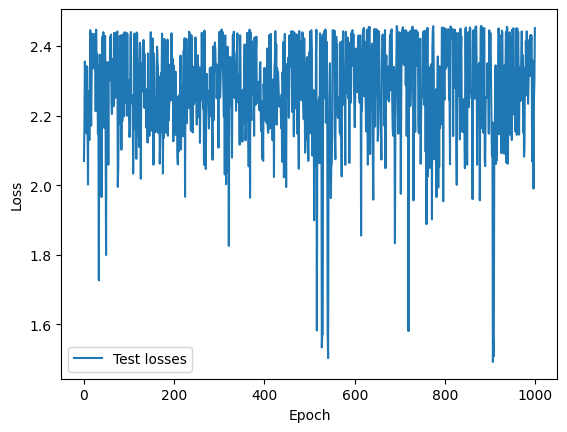

In [231]:
plt.plot(test_losses, label = "Test losses")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Simple Neural Network (but with auto-grad)

In [263]:
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms 

In [264]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, num_classes)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = F.softmax(self.fc3(x), dim = 1)
        return x


In [265]:
#initialize the model, loss function, and optimizer
model = Net(input_size= 784, hidden_size1= 300, hidden_size2 = 200, num_classes = 10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.1)

In [266]:
#train model
total_step = len(train_loader)
train_loss_list = []
train_accuracy_list = []
test_loss_list = []
test_accuracy_list = []
num_epochs = 30
for epoch in range(num_epochs):
    train_loss = 0
    train_acc = 0
    model.train() #sets the model to training mode. 
    ##new## 
    correct = 0
    total = 0
    ####
    for i, (images, labels) in enumerate(train_loader):
        #flatten the images
        images = images.reshape(-1, input_size)

        #forward pass 
        outputs = model(images)
        # _, predicted = torch.max(outputs.data, 1)
        loss = criterion(outputs, labels)

        #backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #track loss and accuracy 
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data,1)
        train_acc += (predicted == labels).sum().item()
    train_loss /= len(train_loader.dataset)
    train_acc /= len(train_loader.dataset)
    train_loss_list.append(train_loss)
    train_accuracy_list.append(train_acc)

    #evaluate the model
    model.eval() #to switch the model to evaluation mode.
    test_loss = 0
    test_acc = 0
    
    with torch.no_grad():
        correct = 0 
        total = 0
        for images, labels in test_loader:
            images = images.reshape(-1, input_size)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data,1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        accuracy = correct / total
        test_accuracy_list.append(accuracy)
        test_loss_list.append(test_loss)
        print(f"Epoch {epoch + 1}/{num_epochs}, Accuracy: {accuracy:.3f}")
        

Epoch 1/30, Accuracy: 0.114
Epoch 2/30, Accuracy: 0.285
Epoch 3/30, Accuracy: 0.461
Epoch 4/30, Accuracy: 0.570
Epoch 5/30, Accuracy: 0.583
Epoch 6/30, Accuracy: 0.697
Epoch 7/30, Accuracy: 0.715
Epoch 8/30, Accuracy: 0.728
Epoch 9/30, Accuracy: 0.739
Epoch 10/30, Accuracy: 0.743
Epoch 11/30, Accuracy: 0.748
Epoch 12/30, Accuracy: 0.750
Epoch 13/30, Accuracy: 0.755
Epoch 14/30, Accuracy: 0.756
Epoch 15/30, Accuracy: 0.757
Epoch 16/30, Accuracy: 0.757
Epoch 17/30, Accuracy: 0.759
Epoch 18/30, Accuracy: 0.760
Epoch 19/30, Accuracy: 0.762
Epoch 20/30, Accuracy: 0.763
Epoch 21/30, Accuracy: 0.763
Epoch 22/30, Accuracy: 0.763
Epoch 23/30, Accuracy: 0.764
Epoch 24/30, Accuracy: 0.764
Epoch 25/30, Accuracy: 0.765
Epoch 26/30, Accuracy: 0.765
Epoch 27/30, Accuracy: 0.767
Epoch 28/30, Accuracy: 0.766
Epoch 29/30, Accuracy: 0.766
Epoch 30/30, Accuracy: 0.766


In [269]:
# num epoch = 25, lr = 0.15, batch_size = 64, accuracy:76.03
# num epoch = 25, lr = 0.1, batch_size = 64, accuracy:74.89
# num epoch = 20, lr = 0.08, batch_size = 64, accuracy: 66.54
# num epoch = 20, lr = 0.15, batch_size = 32, accuracy: 
# num epoch = 20, lr = 0.1, batch_size = 32, accuracy: 
# num epoch = 20, lr = 0.07, batch_size = 32, accuracy: 75.57
# num epoch = 20, lr = 0.06, batch_size = 32, accuracy:
# num epoch = 25, lr = 0.15, batch_size = 32, accuracy: 
# num epoch = 25, lr = 0.1, batch_size = 32, accuracy: 76.56
# num epoch = 25, lr = 0.08, batch_size = 32, accuracy:
# num epoch = 25, lr = 0.05, batch_size = 32, accuracy: 75.24
# num epoch = 30, lr = 0.1, batch_size = 32, accuracy: 
# num epoch = 30, lr = 0.08, batch_size = 32, accuracy:
accuracy

0.7663

In [ ]:
train_loss_list

[0.035975064818064374,
 0.03594226524035136,
 0.035724158120155336,
 0.03424738771915436,
 0.03275102691253026,
 0.031538014429807665,
 0.030382532401879627,
 0.029530042469501496,
 0.02899958557685216,
 0.02864735690156619,
 0.02843328335483869,
 0.028298077617088954,
 0.028208778566122056,
 0.028144635021686553,
 0.028098802141348522,
 0.02786064531604449,
 0.027439339631795883,
 0.027263890035947164,
 0.02713167005777359,
 0.027027917712926865,
 0.026945104372501374,
 0.026878648815552394,
 0.02682575561205546,
 0.02678235943118731,
 0.026746917291482288,
 0.026715581719080606,
 0.026690109997987748,
 0.026667861898740132,
 0.026645962872107822,
 0.026629097924629846,
 0.02661156112353007,
 0.026596804817517597,
 0.02658342442512512,
 0.026570123094320296,
 0.026557992778221767,
 0.026547027627627055,
 0.02653772277235985,
 0.026526369243860246,
 0.026518923715750375,
 0.02650843338370323]

In [268]:
test_loss_list

[2298.132504224777,
 2156.7500029802322,
 2016.7646565437317,
 1906.856592297554,
 1881.871465563774,
 1800.4207365512848,
 1764.9773981571198,
 1745.2211837768555,
 1731.518764257431,
 1724.0949714183807,
 1718.960171699524,
 1715.5391495227814,
 1710.9906214475632,
 1708.5879238843918,
 1706.649276137352,
 1706.5605257749557,
 1704.905796289444,
 1702.6848728656769,
 1701.5835629701614,
 1700.5725191831589,
 1699.894095301628,
 1699.071991801262,
 1698.5439966917038,
 1698.6547272205353,
 1697.1070922613144,
 1696.7447975873947,
 1695.8076961040497,
 1696.357241511345,
 1694.9222680330276,
 1695.2420545816422]

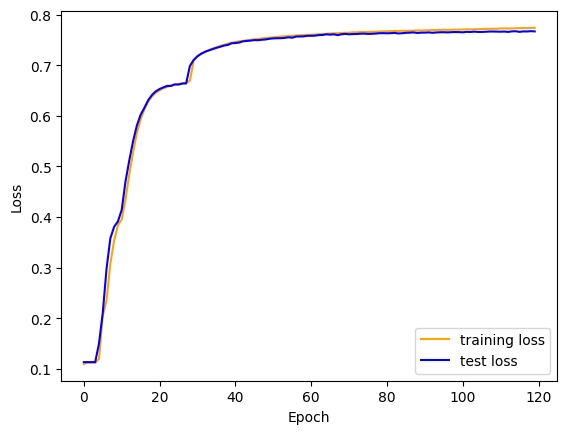

In [ ]:
plt.plot(train_accuracy_list, label = "training accuracy", color = 'orange')
plt.plot(test_accuracy_list, label = "test accuracy", color = 'blue')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Weight initialization 

In [ ]:
class newNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(newNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, num_classes)

        # Initialize weights to zero
        nn.init.zeros_(self.fc1.weight)
        nn.init.zeros_(self.fc2.weight)
        nn.init.zeros_(self.fc3.weight)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = F.softmax(self.fc3(x), dim = 1)
        return x

In [ ]:
# initialize the model, loss function, and optimizer
model = newNet(input_size= 784, hidden_size1= 300, hidden_size2 = 200, num_classes = 10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.07)

# train model
total_step = len(train_loader)
train_loss_list = []
train_accuracy_list = []
test_loss_list = []
test_accuracy_list = []
num_epochs = 30
for epoch in range(num_epochs):
    train_loss = 0
    train_acc = 0
    model.train() #sets the model to training mode. 
    ##new## 
    correct = 0
    total = 0
    ####
    for i, (images, labels) in enumerate(train_loader):
        #flatten the images
        images = images.reshape(-1, input_size)

        #forward pass 
        outputs = model(images)
        # _, predicted = torch.max(outputs.data, 1)
        loss = criterion(outputs, labels)

        #backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #track loss and accuracy 
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data,1)
        train_acc += (predicted == labels).sum().item()
    train_loss /= len(train_loader.dataset)
    train_acc /= len(train_loader.dataset)
    train_loss_list.append(train_loss)
    train_accuracy_list.append(train_acc)

    #evaluate the model
    model.eval() #to switch the model to evaluation mode.
    test_loss = 0
    test_acc = 0
    
    with torch.no_grad():
        correct = 0 
        total = 0
        for images, labels in test_loader:
            images = images.reshape(-1, input_size)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data,1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        accuracy = correct / total
        test_accuracy_list.append(accuracy)
        test_loss_list.append(test_loss)
        print(f"Epoch {epoch + 1}/{num_epochs}, Accuracy: {accuracy:.3f}")
        

Epoch 1/30, Accuracy: 0.114
Epoch 2/30, Accuracy: 0.114
Epoch 3/30, Accuracy: 0.114
Epoch 4/30, Accuracy: 0.114
Epoch 5/30, Accuracy: 0.114
Epoch 6/30, Accuracy: 0.114
Epoch 7/30, Accuracy: 0.114
Epoch 8/30, Accuracy: 0.114
Epoch 9/30, Accuracy: 0.114
Epoch 10/30, Accuracy: 0.114
Epoch 11/30, Accuracy: 0.114
Epoch 12/30, Accuracy: 0.114
Epoch 13/30, Accuracy: 0.114
Epoch 14/30, Accuracy: 0.114
Epoch 15/30, Accuracy: 0.114
Epoch 16/30, Accuracy: 0.114
Epoch 17/30, Accuracy: 0.114
Epoch 18/30, Accuracy: 0.114
Epoch 19/30, Accuracy: 0.114
Epoch 20/30, Accuracy: 0.114
Epoch 21/30, Accuracy: 0.114
Epoch 22/30, Accuracy: 0.114
Epoch 23/30, Accuracy: 0.114
Epoch 24/30, Accuracy: 0.114
Epoch 25/30, Accuracy: 0.114
Epoch 26/30, Accuracy: 0.114
Epoch 27/30, Accuracy: 0.114
Epoch 28/30, Accuracy: 0.114
Epoch 29/30, Accuracy: 0.114
Epoch 30/30, Accuracy: 0.114


In [ ]:
test_loss_list

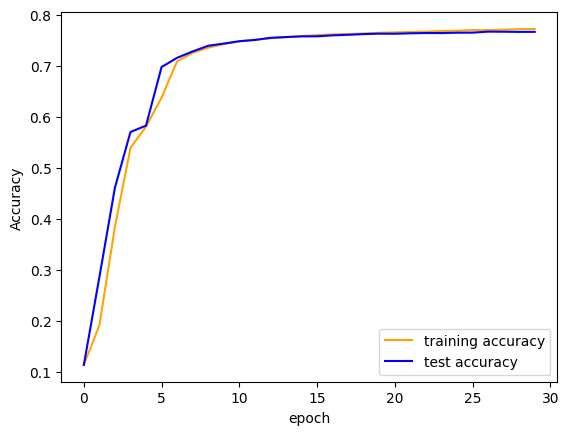

In [267]:
plt.plot(train_accuracy_list, label = "training accuracy", color = 'orange')
plt.plot(test_accuracy_list, label = "test accuracy", color = 'blue')
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
class RandNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(RandNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, num_classes)

        # Initialize weights to zero
        nn.init.uniform_(self.fc1.weight, -1, 1)
        nn.init.uniform_(self.fc2.weight, -1, 1)
        nn.init.uniform_(self.fc3.weight, -1, 1)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = F.softmax(self.fc3(x), dim = 1)
        return x

In [236]:
#lr 0.8 num_epoch 50
#initialize the model, loss function, and optimizer
model = RandNet(input_size= 784, hidden_size1= 300, hidden_size2 = 200, num_classes = 10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.08)

#train model
total_step = len(train_loader)
train_loss_list = []
train_accuracy_list = []
test_loss_list = []
test_accuracy_list = []
num_epochs = 70
for epoch in range(num_epochs):
    train_loss = 0
    train_acc = 0
    model.train() #sets the model to training mode. 
    ##new## 
    correct = 0
    total = 0
    ####
    for i, (images, labels) in enumerate(train_loader):
        #flatten the images
        images = images.reshape(-1, input_size)

        #forward pass 
        outputs = model(images)
        # _, predicted = torch.max(outputs.data, 1)
        loss = criterion(outputs, labels)

        #backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #track loss and accuracy 
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data,1)
        train_acc += (predicted == labels).sum().item()
    train_loss /= len(train_loader.dataset)
    train_acc /= len(train_loader.dataset)
    train_loss_list.append(train_loss)
    train_accuracy_list.append(train_acc)

    #evaluate the model
    model.eval() #to switch the model to evaluation mode.
    test_loss = 0
    test_acc = 0
    
    with torch.no_grad():
        correct = 0 
        total = 0
        for images, labels in test_loader:
            images = images.reshape(-1, input_size)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data,1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        accuracy = correct / total
        test_accuracy_list.append(accuracy)
        test_loss_list.append(test_loss)
        print(f"Epoch {epoch + 1}/{num_epochs}, Accuracy: {accuracy:.3f}")

Epoch 1/70, Accuracy: 0.661
Epoch 2/70, Accuracy: 0.713
Epoch 3/70, Accuracy: 0.728
Epoch 4/70, Accuracy: 0.736
Epoch 5/70, Accuracy: 0.741
Epoch 6/70, Accuracy: 0.803
Epoch 7/70, Accuracy: 0.821
Epoch 8/70, Accuracy: 0.826
Epoch 9/70, Accuracy: 0.831
Epoch 10/70, Accuracy: 0.834
Epoch 11/70, Accuracy: 0.836
Epoch 12/70, Accuracy: 0.839
Epoch 13/70, Accuracy: 0.840
Epoch 14/70, Accuracy: 0.842
Epoch 15/70, Accuracy: 0.844
Epoch 16/70, Accuracy: 0.844
Epoch 17/70, Accuracy: 0.845
Epoch 18/70, Accuracy: 0.846
Epoch 19/70, Accuracy: 0.848
Epoch 20/70, Accuracy: 0.849
Epoch 21/70, Accuracy: 0.849
Epoch 22/70, Accuracy: 0.849
Epoch 23/70, Accuracy: 0.850
Epoch 24/70, Accuracy: 0.851
Epoch 25/70, Accuracy: 0.853
Epoch 26/70, Accuracy: 0.893
Epoch 27/70, Accuracy: 0.924
Epoch 28/70, Accuracy: 0.933
Epoch 29/70, Accuracy: 0.936
Epoch 30/70, Accuracy: 0.938
Epoch 31/70, Accuracy: 0.941
Epoch 32/70, Accuracy: 0.941
Epoch 33/70, Accuracy: 0.943
Epoch 34/70, Accuracy: 0.944
Epoch 35/70, Accuracy: 

In [237]:
train_accuracy_list

[0.43833333333333335,
 0.6851666666666667,
 0.7153833333333334,
 0.7287,
 0.73685,
 0.7650166666666667,
 0.8153166666666667,
 0.82585,
 0.8317333333333333,
 0.83685,
 0.8408166666666667,
 0.8438666666666667,
 0.8463,
 0.84815,
 0.8504166666666667,
 0.8522333333333333,
 0.8538,
 0.8549833333333333,
 0.85635,
 0.8577166666666667,
 0.8588,
 0.8602,
 0.86135,
 0.8621833333333333,
 0.8629333333333333,
 0.8680833333333333,
 0.9282333333333334,
 0.9403166666666667,
 0.94555,
 0.94895,
 0.9510666666666666,
 0.9528333333333333,
 0.95465,
 0.9560833333333333,
 0.9574,
 0.9583,
 0.9593833333333334,
 0.96055,
 0.9614,
 0.9624166666666667,
 0.9630166666666666,
 0.96405,
 0.9644333333333334,
 0.965,
 0.9655833333333333,
 0.9664833333333334,
 0.96695,
 0.9676166666666667,
 0.9681833333333333,
 0.9688,
 0.969,
 0.9695,
 0.9698666666666667,
 0.9704333333333334,
 0.9708333333333333,
 0.9711833333333333,
 0.97145,
 0.9717,
 0.9719666666666666,
 0.9723666666666667,
 0.9724833333333334,
 0.9729666666666666

In [ ]:
test_loss_list

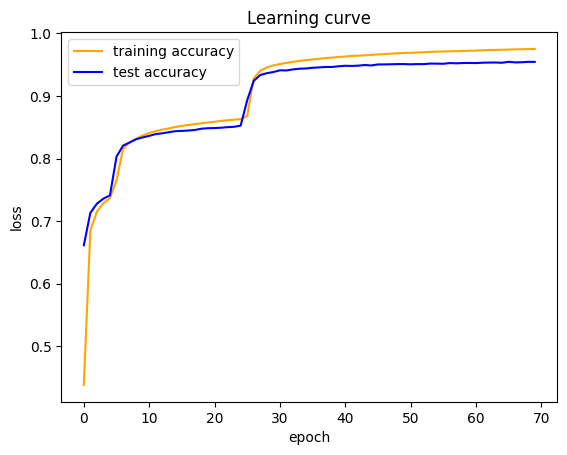

In [239]:
plt.plot(train_accuracy_list, label = "training accuracy", color = 'orange')
plt.plot(test_accuracy_list, label = "test accuracy", color = 'blue')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Learning curve")
plt.legend()
plt.show()